<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-No-Lineal-y-Regresion-Logistica/blob/main/a%C3%B1o2023_act7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
df= pd.read_csv("Gastos_costos_2023.csv")
df.head(2)

,Unnamed: 0,Fecha,Folio,Proveedor,Descripción,TIPO GASTO,Importe,IVA,TOTAL MX
0,0,2023-01-01,31,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.0,0.0,0.0
1,1,2023-01-01,38,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.0,0.0,0.0


In [ ]:
#Cargar archivo csv desde seaborn
#df=sns.load_dataset(name='car_crashes')
#df.head(5)

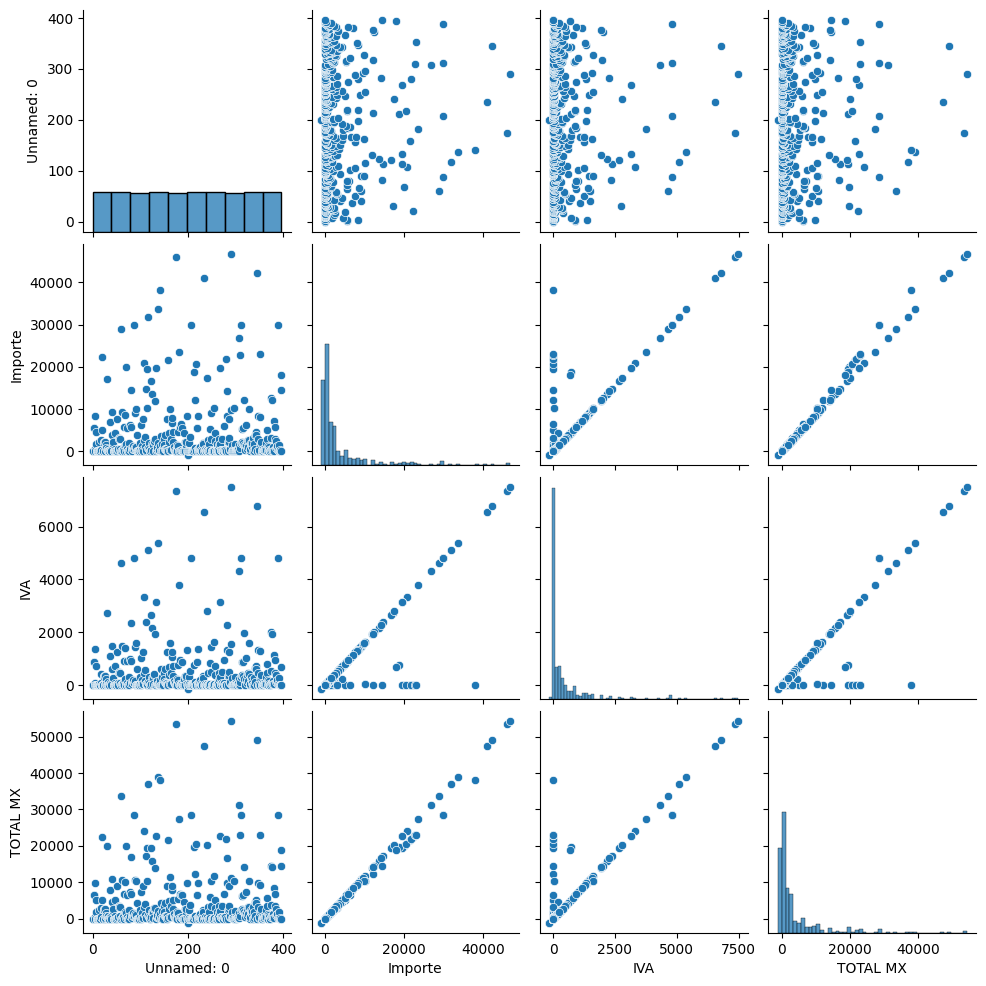

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['IVA']]
Var_Dep= df['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**


            y = ax^2 + bx + c

            y = ax^3 + bx + c

            y = ax^3 + bx^2 + c

            y = a*exp(bx) + c

**MODELO 1**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['IVA'], df['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 6.31404246e-04, -1.78288232e-01,  2.79658165e+01])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['IVA'], df['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
0,1163.411387
1,1163.411387
2,6621.687993
3,6622.314493
4,9560.744414
...,...
392,1163.411387
393,1163.411387
394,5337.942869
395,1163.411387


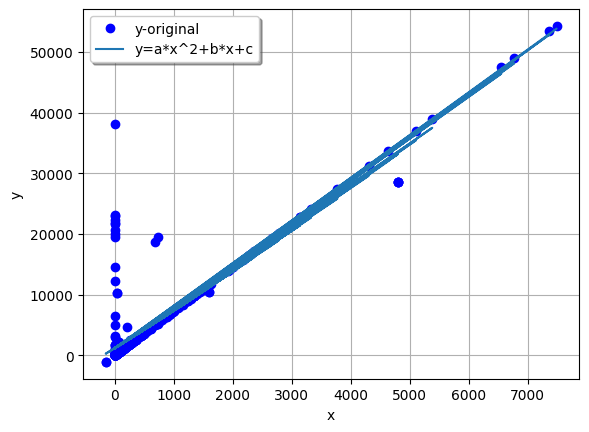

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.779882322397788

**MODELO 2**

In [ ]:
def func2(x, a, b, c):
    #return a*np.exp(b*x)+c
    #return a*x**3 + b*x + c
    return a*x**3 + b*x**2 + c



In [ ]:
#df[['IVA',"TOTAL MX"]] = df[['IVA',"TOTAL MX"]].replace([np.inf, -np.inf], 1e9)
#df[['IVA',"TOTAL MX"]].head(10)
#df['IVA'] = df['IVA'].round(2)


In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['IVA'], df['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-2.45729625e-07,  2.67881903e-03,  2.19707953e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['IVA'], df['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

In [ ]:
#yfit2["IVA"] = yfit2["IVA"].replace([np.inf, -np.inf], 1e9)
#yfit2.dropna(axis=1, inplace=True)
#yfit2['IVA'] = yfit2['IVA'].round(0).astype(int)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

,IVA
0,2197.079533
1,2197.079533
2,2197.079530
3,2197.079530
4,2197.079524
...,...
392,2197.079533
393,2197.079533
394,2197.079531
395,2197.079533


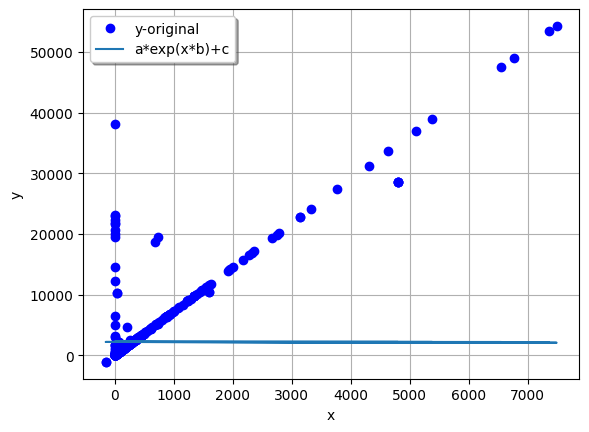

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

-0.06876688394605823